# Clustering

In [1]:
import astropy
import starfinder
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

print(starfinder.__version__)

0.1.dev13+g78f20f7.d20250204


In [2]:
%matplotlib ipympl

We begin by reading in the file, thresholding, setting the usable region, and estimating the background

In [3]:
image_file = "data/ngc744-0001_60s_v.fit"
sf = starfinder.StarField(image_file)
sf.n_ij = sf.threshold_hot_pixels(sf.n_ij, 0.999)
sf.set_usable_region()
sf.estimate_background()

INFO:starfinder:Reading file data/ngc744-0001_60s_v.fit
INFO:starfinder:Background file data/ngc744-0001_60s_v.fit_151_0_bkg.fit exists: using this


Now, we find clusters and process them

In [4]:
sf.find_clusters()
sf.process_cluster_list()

INFO:starfinder:Image ngc744-0001_60s_v.fit has 16033 clusters


Stars for image data/ngc744-0001_60s_v.fit
Number numPix   Flux     mu_x     mu_y      sigma_x  sigma_y  rho_xy
   0   1406   281687.0  1001.65   452.05    4.394    4.183    0.004
   1    925   241086.9  1043.11   669.80    4.501    4.423    0.019
   2    815   192031.0   878.62   567.88    4.334    4.215    0.030
   3    841   184070.7   110.94   359.09    4.259    4.189   -0.007
   4    742   181149.6   193.75   818.75    4.255    4.229    0.012
   5    711   165470.0   953.17   734.49    4.234    4.105    0.041
   6    692   146322.0   105.43   782.99    4.099    4.073    0.014
   7    608   116496.9   683.31   561.58    4.003    3.924    0.027
   8    628   100311.2   838.76   215.14    3.941    3.901    0.019
   9    543    94525.8   814.82   546.93    3.920    3.833    0.029
  10    560    92923.7   379.31   894.68    3.839    3.824    0.025
  11    620    92021.9   218.98   263.28    3.933    3.895    0.012
  12    564    81392.1   966.29   290.77    3.910    3.824    0.030
  13

Finally, we can add marks to our plot to show all of the stars found:

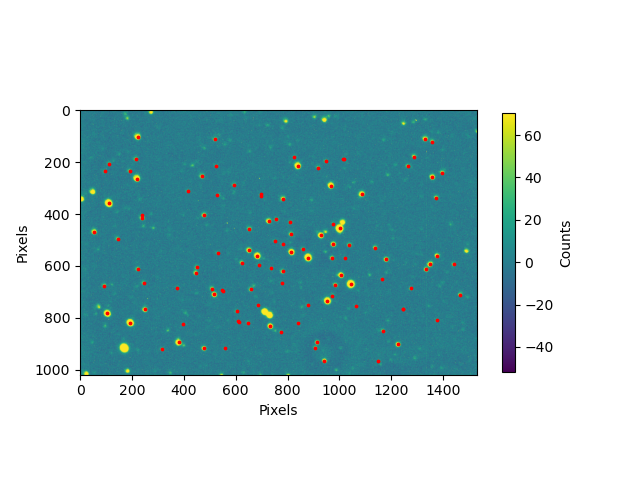

In [5]:
residual = sf.n_ij - sf.b_ij

fig, ax = plt.subplots()
vmax = np.quantile(residual, 0.99)
cbar = ax.imshow(residual, origin="upper", vmax=vmax)
ax.set(xlabel="Pixels", ylabel="Pixels")
ax.scatter(sf.mux_list, sf.muy_list, s=3, color='r')
plt.colorbar(cbar, shrink=0.7, label="Counts")
plt.show()